In [7]:
import os
import geopandas as gpd

import contextily as cx
import matplotlib.pyplot as plt

In [8]:
def plot_df(df, column=None, ax=None, alpha=0.5,crs=3857):
    "Plot based on the `geometry` column of a GeoPandas dataframe"
    df = df.copy()
    df = df.to_crs(epsg=crs)  # web mercator

    if ax is None:
        _, ax = plt.subplots(figsize=(8,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    df.plot(
        ax=ax,
        alpha=alpha, edgecolor='k',
        column=column, categorical=True,
        legend=True, legend_kwds={'loc': 'upper left'},
    )
    cx.add_basemap(ax, crs=df.crs, source=cx.providers.CartoDB.Positron)


def plot_shape(shape, ax=None, crs=3857):
    df = gpd.GeoDataFrame({'geometry': [shape]}, crs='EPSG:4326')
    plot_df(df, ax=ax, crs=crs)


### American Viticulture Areas

In [9]:
file = 'avas_allboundaries.geojson'
path = 'data/'

url = 'GeoJSON:https://github.com/UCDavisLibrary/ava/blob/master/avas_aggregated_files/'
target = path+file
if os.path.exists(target):
  ava = gpd.read_file(target)
else:
  ava = gpd.read_file(url+file)
  ava.to_file(target, driver='GeoJSON')

ava.info()
ava.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ava_id                333 non-null    object        
 1   name                  333 non-null    object        
 2   aka                   9 non-null      object        
 3   created               333 non-null    datetime64[ms]
 4   removed               0 non-null      object        
 5   county                333 non-null    object        
 6   state                 333 non-null    object        
 7   within                217 non-null    object        
 8   contains              90 non-null     object        
 9   petitioner            315 non-null    object        
 10  cfr_author            321 non-null    object        
 11  cfr_index             333 non-null    object        
 12  cfr_revision_history  333 non-null    object        
 13  approved_map

,ava_id,name,aka,created,removed,county,state,within,contains,petitioner,...,cfr_index,cfr_revision_history,approved_maps,boundary_description,used_maps,valid_start,valid_end,lcsh,sameas,geometry
0,ozark_mountain,Ozark Mountain,None,1986-08-01,None,Adair|Barry|Barton|Baxter|Benton|Benton|Bollin...,AR|MO|OK,None,Altus|Arkansas Mountain|Augusta|Hermann|Ozark ...,Al Weiderkehr,...,9.108,"[T.D. ATF-231, 51 FR 24144, July 2, 1986; 51 F...",Approved maps. The appropriate maps for determ...,General. The Ozark Mountain viticultural area ...,"All scale 250,000 maps: ""St. Louis, Missouri...",NaT,NaT,None,None,"POLYGON ((-90.11798 38.80646, -90.12058 38.812..."
1,upper_mississippi_river_valley,Upper Mississippi River Valley,None,2009-07-22,None,Allamakee|Benton|Black Hawk|Bremer|Buchanan|Bu...,IL|IA|MN|WI,None,Lake Wisconsin,Upper Mississippi River Valley AVA Committee,...,9.216,"[T.D. TTB-77, 74 FR 29400, June 22, 2009]","(1) State of Minnesota, scale 1:500,000; compi...",(1) The beginning point is on the State of Min...,"(1) State of Minnesota, scale 1:500,000; compi...",NaT,NaT,None,None,"POLYGON ((-92.96112 44.95034, -92.96126 44.932..."
2,ohio_river_valley_19831007,Ohio River Valley,None,1983-09-07,None,Adams|Athens|Belmont|Boone|Boyd|Bracken|Brecki...,IN|KY|OH|WV,None,Kanawha River Valley,"Mr. John A. Garrett, proprietor of Villa Milan...",...,9.78,"[T.D. ATF-144, 48 FR 40379, Sept. 7, 1983]","(1) Paducah NJ 16-7 (dated 1949, revised 1969)...",(1) The beginning point is the point at\nwhich...,"(1) Paducah NJ 16-7 (dated 1949, revised 1969)...",1983-10-07,2013-03-07,None,None,"POLYGON ((-87.42287 38.40968, -87.75361 38.399..."
3,ohio_river_valley,Ohio River Valley,None,1983-09-07,None,Adams|Athens|Belmont|Boone|Boyd|Bracken|Brecki...,IN|KY|OH|WV,None,Kanawha River Valley,Jim Butler of Butler Winery,...,9.78,"[T.D. ATF-144, 48 FR 40379, Sept. 7, 1983, as ...","(1) Paducah NJ 16-7 (dated 1949, revised 1969)...",The Ohio River Valley viticultural area is loc...,"(1) Paducah NJ 16-7 (dated 1949, revised 1969)...",2013-03-07,NaT,None,None,"POLYGON ((-87.42287 38.40968, -87.75361 38.399..."
4,columbia_valley_20010427,Columbia Valley,None,1984-11-13,None,Adams|Asotin|Benton|Chelan|Columbia|Douglas|Fe...,OR|WA,None,Ancient Lakes of Columbia Valley|Candy Mountai...,Mr Gaynor S. Derby of Spring Valley Vineyards,...,9.74,"[T.D. ATF-190, 49 FR 44897, Nov. 13, 1984, as ...","(1) ""Concrete. Washirgton, US4\nBritish Columb...",(c) Boundaries. The Columbia Valley\nviticultu...,"(1) ""Concrete. Washirgton, US4\nBritish Columb...",2001-04-27,2016-05-20,None,None,"POLYGON ((-120.4587 45.43119, -120.45828 45.43..."


In [10]:
ava[ava.state.str.contains('CA')][['ava_id', 'name', 'state', 'geometry']].head()

,ava_id,name,state,geometry
9,central_coast,Central Coast,CA,"POLYGON ((-121.80091 36.86127, -121.80058 36.8..."
10,central_coast_19990322,Central Coast,CA,"POLYGON ((-121.80091 36.86127, -121.80058 36.8..."
11,central_coast_19851125,Central Coast,CA,"POLYGON ((-121.80232 36.85655, -121.80499 36.8..."
18,north_coast,North Coast,CA,"POLYGON ((-122.71637 38.02808, -122.58876 37.9..."
19,north_coast_20180108,North Coast,CA,"POLYGON ((-122.71637 38.02808, -122.58876 37.9..."


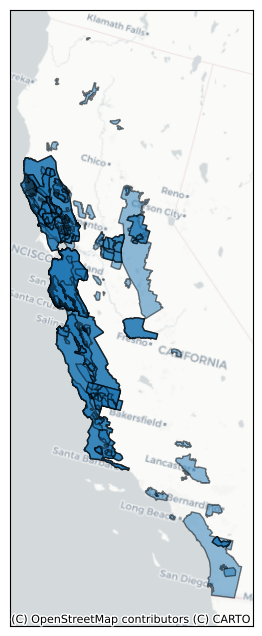

In [11]:
plot_df(gpd.GeoDataFrame(geometry=ava[ava.state.str.contains('CA')].geometry.values), crs=6350)

**Alexander Valley**

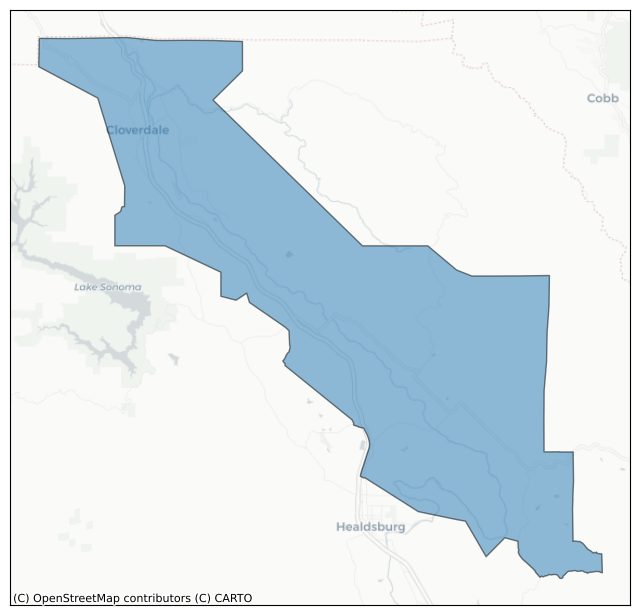

In [12]:
plot_df(gpd.GeoDataFrame(geometry=ava[ava.ava_id=='alexander_valley'].geometry.values, crs=4326).to_crs(6350))

**AVA Regions can Overlap**

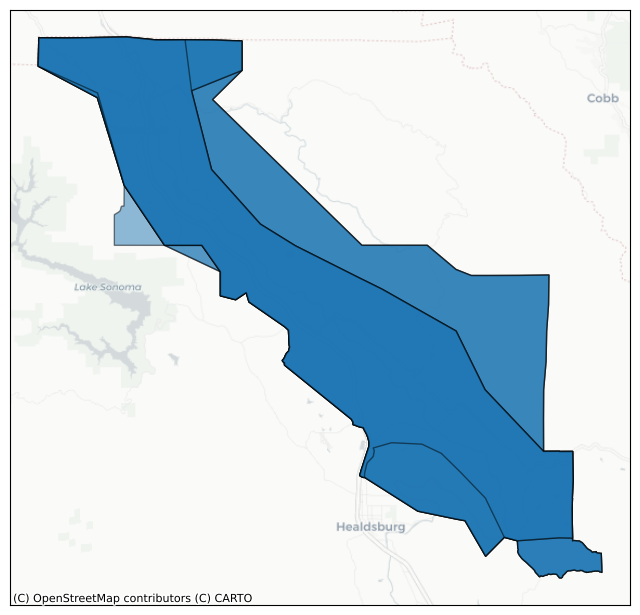

In [13]:
plot_df(gpd.GeoDataFrame(geometry=ava[ava.name=='Alexander Valley'].geometry.values, crs=4326).to_crs(6350))